# Probability

Basic axioms revisited, distributions, PDF/CDFs, etc.

##### Independence

Two events A, B are independent iff P(AB) = P(A)P(B)

##### Conditional Probability

The probability of A conditioned on B (that is, given that B has already occurred) is P(A|B), where
P(A|B) = P(AB) / P(B). This is often re-factored to isolate the joint-probability definition as the missing piece:
P(AB) = P(A|B)P(B). This is the joint-P decomposition of a left-to-right LM.

##### Bayes Theorem

A theorem for flipping conditional probabilities. 
P(AB) = P(A|B)P(B)
P(AB) = P(B|A)P(A)
P(A|B) = P(B|A)P(A) / P(B)

#### Probability Density Functions (PDF)




In [70]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, uniform
from collections import Counter

In [42]:
def uniform_pdf(x: float) -> float:
    """the p.d.f. for uniform distribution between [0, 1)"""
    return 1 if x >= 0 and x < 1 else 0
assert abs(uniform.pdf(.59) - uniform_pdf(.59)) < 10**-5
help(uniform.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



Why is 1 the return value? what does a single point on the p.d.f signify?

The integral of the pdf `f(x)` between `[x, x+h)` gives the probability that the random variable x has a value between x (inclusive) and x + h (exclusive). Thus we can think of this return value being defined as the value that makes this true of a uniform distribution: the probability that 0 <= x < 1 is 1 by definition, and all probabilities are equal, so we need a horizontal function whose integral from `[0, 1)` is 1, hence f(x) = 1 for 0 <= x < 1

##### Cumulative Density Function (CDF)

The CDF g(x) defines the probability that a given random variable has a value less than x. It is necessarily equivalent to the integral of the PDF from `[0, x)`

In [43]:
# note the statement holds: integral of f(n) = 1 over (0, x) is x. 
# unlike the pdf, we need to have all x in [1, inf) have cdf of 1
def uniform_cdf(x: float) -> float:
    """the c.d.f. for uniform distribution between [0, 1)"""
    return min(x, 1) if x >= 0 else 0
assert abs(uniform.cdf(.59) - uniform_cdf(.59)) < 10**-5
help(uniform.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.uniform_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [44]:
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
        """the pdf of a normal distribution with mean mu and std-dev sigma"""
        sqrt_2pi = math.sqrt(2 * math.pi)
        power = -.5 * ((x - mu) / sigma)**2
        coeff = 1 / (sigma * sqrt_2pi)
        return coeff * math.exp(power)
assert abs(norm.pdf(.59, loc=0, scale=1) - normal_pdf(.59, 0, 1)) < 10**-5
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



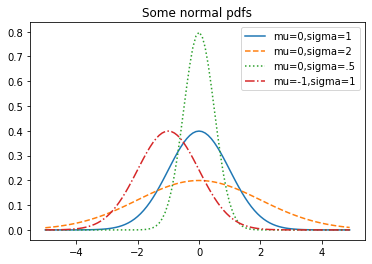

In [34]:
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x) for x in xs], '-',label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=.5) for x in xs], ':', label='mu=0,sigma=.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title('Some normal pdfs')
plt.show()

The normal distribution is defined with the following special property:
1. The standard normal distribution `Z` has mean `0` and standard deviation `1`.
2. A normal distribution `X` has mean `mu` and a standard deviation `sigma`. 
3. The following holds: `X = (sigma * Z) + mu`

In [46]:
# we need the error function (https://en.wikipedia.org/wiki/Error_function) 
# to define a cdf for the normal distrubution
help(math.erf)

Help on built-in function erf in module math:

erf(x, /)
    Error function at x.



In [48]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    Cumulative distribution function for a random variable x, for a normal distribution with mean mu and std dev sigma
    """
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2
assert abs(norm.cdf(.59, loc=0, scale=1) - normal_cdf(.59, 0, 1)) < 10**-5
help(norm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



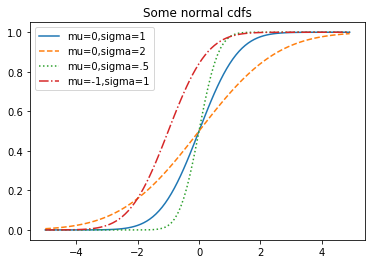

In [50]:
xs = [x / 10. for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x) for x in xs], '-',label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=.5) for x in xs], ':', label='mu=0,sigma=.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title('Some normal cdfs')
plt.show()

Sometimes, it is useful to find the inverse of the normal cdf: Where the `cdf(x, mu, sigma)` tells us the probability that the `RV = Normal(mu, sigma)` is less than some value `x`, the `inverse_cdf(p, mu, sigma)` tells us for a proportion `p` of the possible RV values are less than some value `x`

In [60]:
def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance=10**-7) -> float:
    """
    inverse of the normal cdf function
    """
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    # now were working with a standard normal cdf
    low_z, hi_z = -10.0, 10.0 # extreme bounds for a STANDARD normal cdf, though low enough tolerance breaks this
    mid_z = (hi_z - low_z) / 2.0
    mid_p = normal_cdf(mid_z)
    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z) / 2.0
        mid_p = normal_cdf(mid_z)
        if mid_p > p:
            # our mid-point is too high
            hi_z = mid_z
        else:
            # our mid-point is too low
            low_z = mid_z
    return mid_z
assert(norm.ppf(.4, 3., .4) - inverse_normal_cdf(.4, 3., .4) < 10**-5)
help(norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



We'll demonstrate the Central Limit Theorem using Bernoulli and Binomial variables

In [68]:
def bernoulli_expmt(p: float = 0.5) -> int:
    """
    returns a sample from a bernoulli distribution with probability of 1 being p, 0 being 1 - p
    """
    return 1 if random.random() < p else 0

def binomial(n: int, p: float = 0.5) -> int:
    """
    A binomial random sample from n bernoulli trials with probability p per trial
    """
    return sum([bernoulli_expmt(p) for i in range(n)])

The mean of a bernoulli RV X = Bernoulli(p) is p. The expected value is p. The variance is `p * (1 - p)`, standard deviation being `sqrt(p( * (1 - p))`. The central limit theorem says that as n gets large, a Binomial RV X' = Binomial(n, p) will be approximately normally distributed by  `mu + sigma * Z`, or in this case, `p + Z * (sqrt(p( * (1 - p))`. This is b/c a binomial distribution is by definition a sum if identically distributed (bernoulli) random variables.

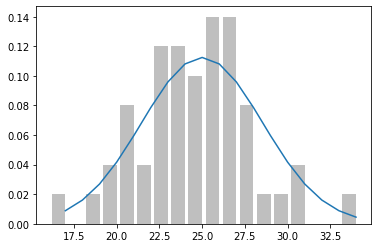

In [75]:
# plot a binomial histogram against a 
def binomial_histogram(p: float, n: int = 50, num_samples: int = 50):
    # use a bar char to show some actual binomial samples
    data = [binomial(n, p) for _ in range(num_samples)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_samples for v in histogram.values()],
            0.8, color='0.75')
    # now show normal approximation: expected value of a binomial is n * p
    xs = range(min(data), max(data) + 1)
    mu = n * p
    sigma = math.sqrt( n * p * (1 - p))
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys, '-',label='mu={0},sigma={1}'.format(mu, sigma))
    return plt
x = binomial_histogram(.5)
x.show()

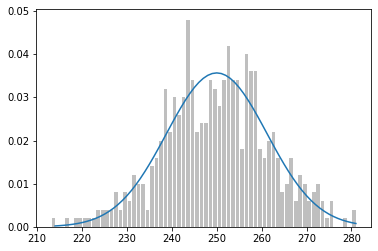

In [76]:
# now with more samples
x = binomial_histogram(.5, 500, 500)
x.show()

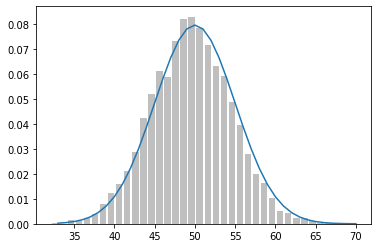

In [78]:
# even more samples
x = binomial_histogram(.5, 100, 5000)
x.show()

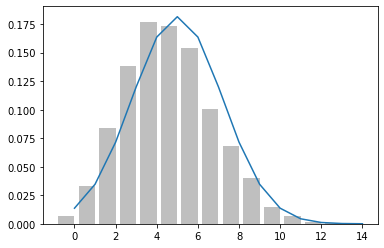

In [80]:
# imbalanced p (note the small variance)
x = binomial_histogram(.05, 100, 5000)
x.show()